# 참고

[프로그래머를 위한 베이지안 with 파이썬](https://github.com/CamDavidsonPilon/Probabilistic-Programming-and-Bayesian-Methods-for-Hackers)

github -> githubtocolab -> 번역

# 프로그래머를 위한 베이지안 with 파이썬

## 목차

### 라이브러리

In [8]:
from IPython.core.pylabtools import figsize

# import os
# import io
from collections import Counter

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
fm.fontManager.addfont(font_path)
font_name = fm.FontProperties(fname=font_path).get_name()
plt.rcParams['font.family'] = font_name
plt.rcParams['axes.unicode_minus'] = False

%matplotlib inline

import scipy.stats as stats

### 동전 던지기 예시

In [2]:
# 사전분포
베타연속확률변수 = stats.beta
# 보고싶은 앞면이 나올 확률들
_0부터1까지일정한간격의100개의숫자 = np.linspace(0, 1, 100)

동전을던진횟수들 = [0, 1, 2, 3, 4, 5, 8, 15, 50, 500]

# 동전 던지기 결과
동전던지기확률 = 0.5
베르누이이산확률변수 =  stats.bernoulli.rvs(동전던지기확률, size=동전을던진횟수들[-1])

# 사후분포, 동전 던지기 결과로 업데이트한 분포 
동전을던진횟수 = 7
앞면이나온횟수 = 베르누이이산확률변수[:동전을던진횟수들[동전을던진횟수]].sum()
뒷면이나온횟수 = 동전을던진횟수들[동전을던진횟수] - 앞면이나온횟수

# 베타 분포의 확률 밀도 함수에 앞면이 나올 확률들을 대입하여 얻은 확률밀도 값들
확률밀도함수 = 베타연속확률변수.pdf(_0부터1까지일정한간격의100개의숫자, 1 + 앞면이나온횟수, 1 + 뒷면이나온횟수)

### note 

켤레 사전 분포
    사전 분포와 사후 분포가 같은 분포족에 속하는 경우
    장점: 계산의 편리성, 직관적인 해석, 베이지안 업데이트가 간단함
    단점: 모든 경우에 적용 가능한 것은 아니다. 사전 정보를 정확하게 반영하기 어려울 수 있다.

켤러 사전 분포가 아닌 분포
    정규 분포의 정규-정규 사전 분포, 포아송 분포의 감마 사전 분포, 다양한 비모수적 사전 분포
    단점: 계산의 복잡성, MCMC 방법과 같은 수치적 방법을 사용하여 사후 분포를 근사, 모델 선택의 어려움, 해석의 어려움

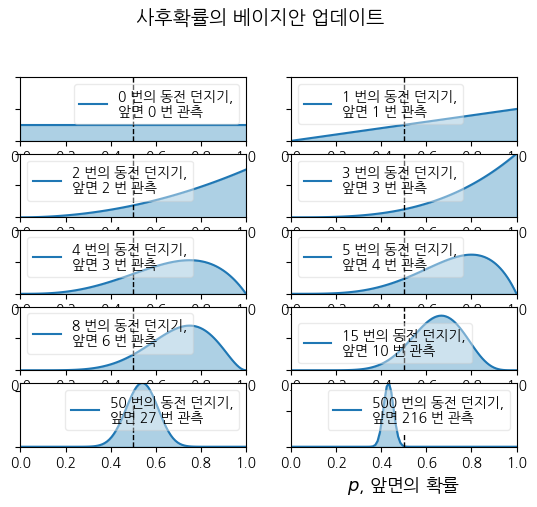

<Figure size 4000x2000 with 0 Axes>

In [3]:
사전분포_베타 = stats.beta
동전던지기_시행횟수들 = [0,1,2,3,4,5,8,15,50,500]

동전던지기_확률 = 0.5
동전던지기_결과 = stats.bernoulli.rvs(동전던지기_확률 , size=동전던지기_시행횟수들[-1])

x = np.linspace(0, 1, 100)

for k, N in enumerate(동전던지기_시행횟수들):
    sx = plt.subplot(int(len(동전던지기_시행횟수들) / 2), 2, k + 1)
    plt.xlabel("$p$, 앞면의 확률", fontsize=13) \
        if k in [0, len(동전던지기_시행횟수들) - 1] else None
    plt.setp(sx.get_yticklabels(), visible=False)
    heads = 동전던지기_결과[:N].sum()
    y = 사전분포_베타.pdf(x, 1 + heads, 1 + N - heads)
    plt.plot(x, y, label="%d 번의 동전 던지기,\n앞면 %d 번 관측" % (N, heads))
    plt.fill_between(x, 0, y, color="#348ABD", alpha=0.4)
    plt.vlines(0.5, 0, 4, color="k", linestyles="--", lw=1)

    leg = plt.legend()
    leg.get_frame().set_alpha(0.4)
    plt.autoscale(tight=True)

plt.suptitle("사후확률의 베이지안 업데이트", y=1.02, fontsize=14)
plt.figure(figsize=(40, 20))
plt.tight_layout()

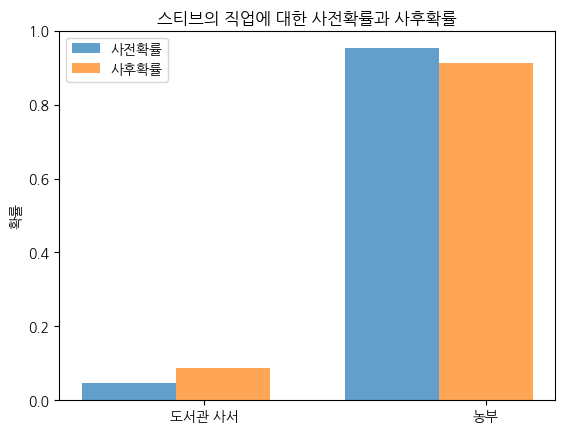

In [4]:
prior = [1/21. ,20/21.]
posterior = [0.087, 1-0.087]

plt.bar([0, .7], prior, alpha=0.70, width=0.25, label="사전확률")

plt.bar([0+0.25, .7+0.25], posterior, alpha=0.7,
        width=0.25,
        label="사후확률")

plt.xticks([0.20, 0.95], ["도서관 사서", "농부"])
plt.title("스티브의 직업에 대한 사전확률과 사후확률")
plt.ylabel("확률")
plt.legend(loc="upper left");

Text(0.5, 1.0, 'Is my code bug-free?')

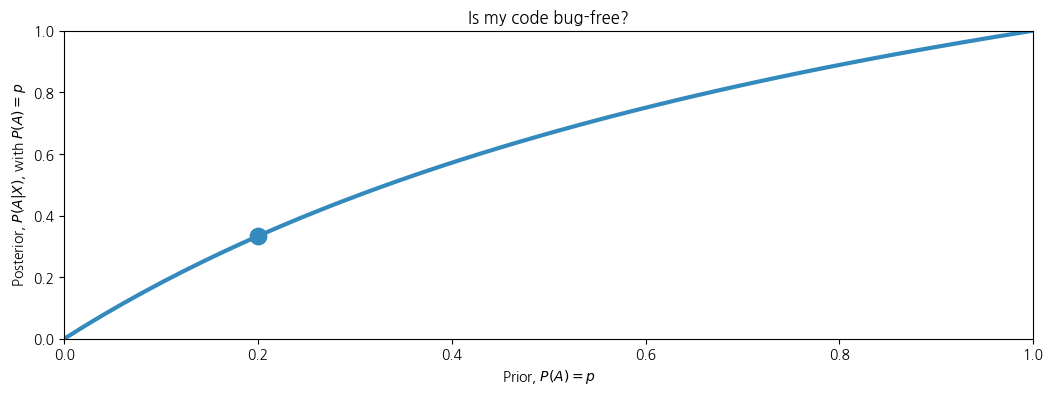

In [9]:
figsize(12.5, 4)
p = np.linspace(0, 1, 50)
plt.plot(p, 2 * p / (1 + p), color="#348ABD", lw=3)
# plt.fill_between(p, 2*p/(1+p), alpha=.5, facecolor=["#A60628"])
plt.scatter(0.2, 2 * (0.2) / 1.2, s=140, c="#348ABD")
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.xlabel("Prior, $P(A) = p$")
plt.ylabel("Posterior, $P(A|X)$, with $P(A) = p$")
plt.title("Is my code bug-free?")